<a href="https://colab.research.google.com/github/Alphteow/Advertising_Kaggle/blob/main/XGandGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import shap

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Provide the path to the file in your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/DBA5102/Advertising_Kaggle/data/Advertising Budget and Sales.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


<h1>EDA</h1>

In [20]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [21]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [45]:
# Rename columns for easier access
df.rename(columns={
    'TV Ad Budget ($)': 'TV_Budget',
    'Radio Ad Budget ($)': 'Radio_Budget',
    'Newspaper Ad Budget ($)': 'Newspaper_Budget',
    'Sales ($)': 'Sales'
}, inplace=True)

df = df[['TV_Budget', 'Radio_Budget', 'Newspaper_Budget', 'Total_Budget', 'Sales']]

In [46]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

0


In [47]:
# Check data types
print(df.dtypes)

# Convert columns to numeric if necessary
df = df.astype({
    'TV_Budget': 'float',
    'Radio_Budget': 'float',
    'Newspaper_Budget': 'float',
    'Sales': 'float'
})

TV_Budget           float64
Radio_Budget        float64
Newspaper_Budget    float64
Total_Budget        float64
Sales               float64
dtype: object


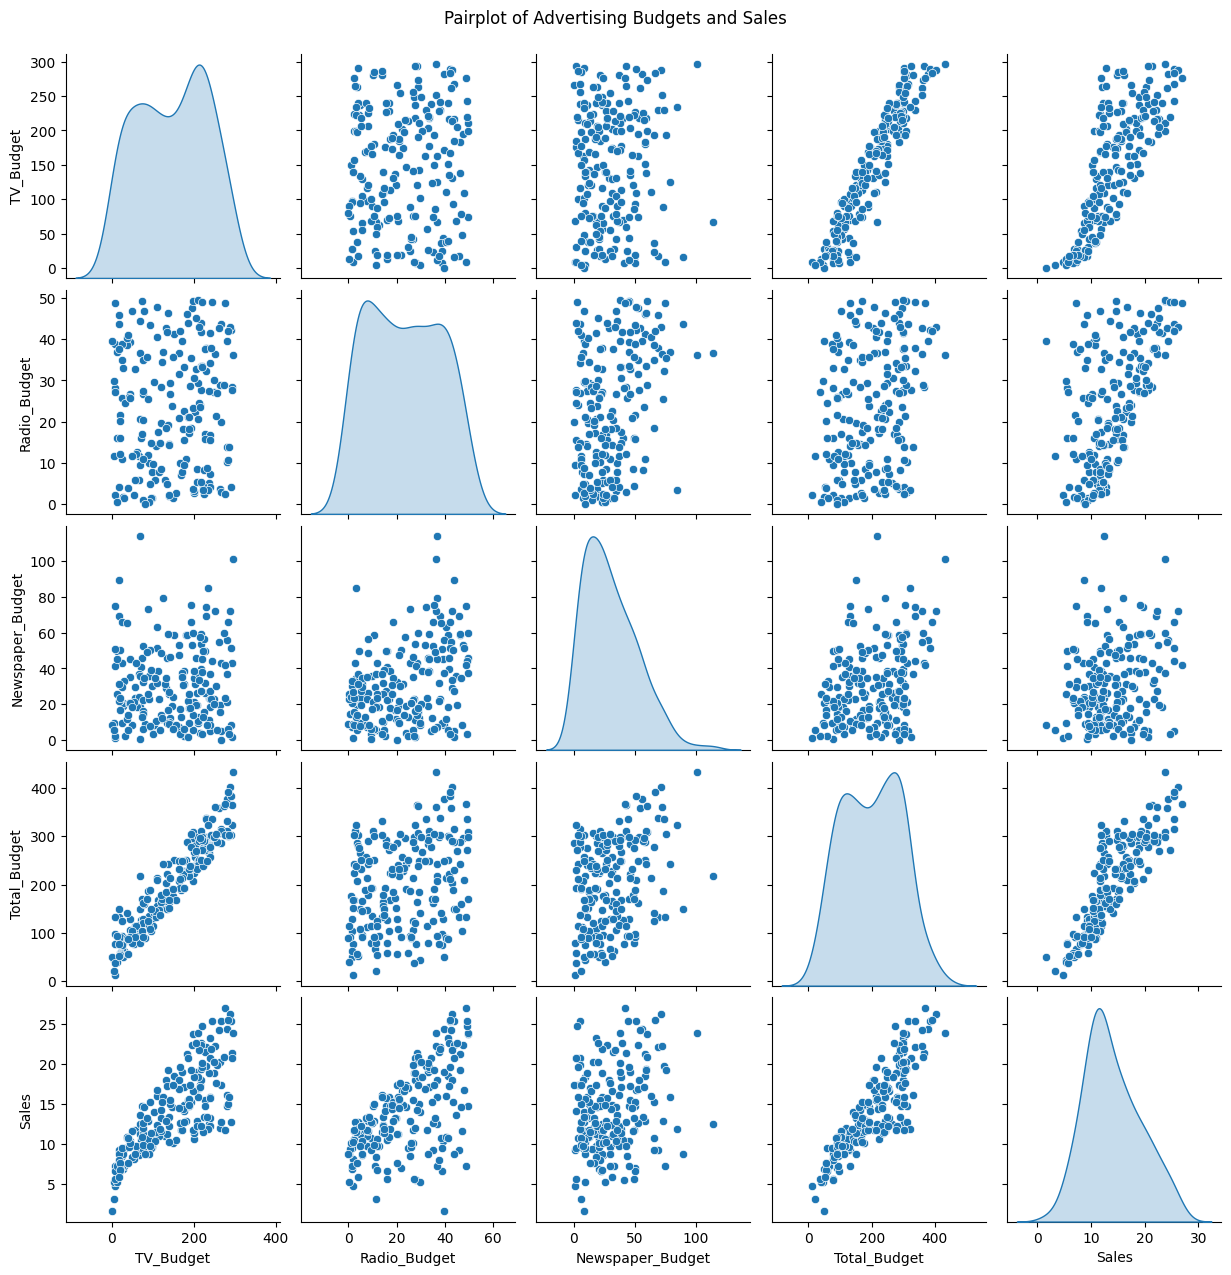

In [48]:
# Visualize distributions of advertising budgets and sales
sns.pairplot(df[['TV_Budget', 'Radio_Budget', 'Newspaper_Budget', 'Total_Budget', 'Sales']], diag_kind='kde')
plt.suptitle("Pairplot of Advertising Budgets and Sales", y=1.02)
plt.show()

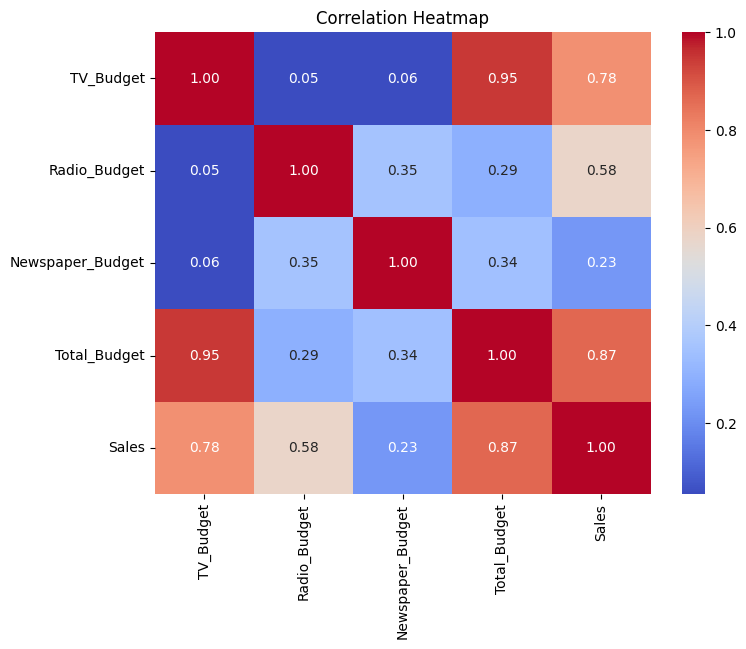

In [49]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<h1>Feature Engineering</h1>

In [26]:
# Create a new column for total advertising budget
df['Total_Budget'] = df['TV_Budget'] + df['Radio_Budget'] + df['Newspaper_Budget']

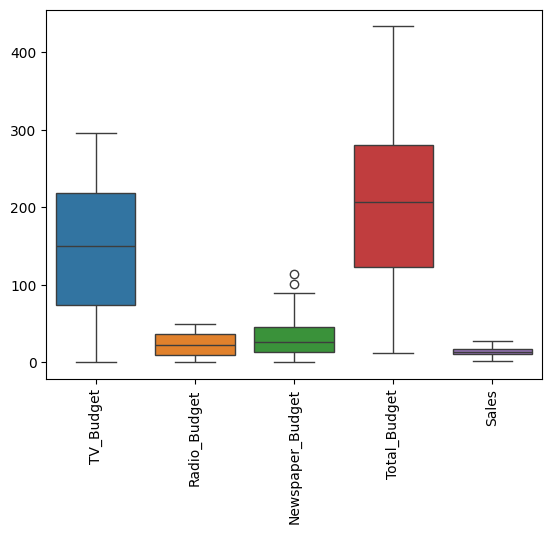

In [37]:
ax = sns.boxplot(data=df[['TV_Budget', 'Radio_Budget', 'Newspaper_Budget', 'Total_Budget', 'Sales']])
ax.tick_params(axis='x', rotation=90)
plt.show()

<h1>Modelling</h1>

In [32]:
# Features (X) and Target (y)
X = df[['TV_Budget', 'Radio_Budget', 'Newspaper_Budget', 'Total_Budget']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n\n")

# Identify the best-performing model
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
print(f"\nBest Performing Model: {best_model_name}")